# Исследование надежности заемщиков


## Описание проекта

Заказчик — кредитный отдел банка. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга для оценки способности потенциального заёмщика вернуть кредит банку.

## Задача

Выяснить, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
# импортируем необходимые билиотеки
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport


In [2]:
# загрузим данные
data = pd.read_csv('C:\\Users\\Mikhail\\Яндекс_Практикум\\data_set\\data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
# группируем данные по выплатам в зависимости от количества детей
data.groupby('debt')['children'].value_counts()

debt  children
0     0           13028
      1            4364
      2            1858
      3             303
      4              37
      5               9
1     0            1063
      1             444
      2             194
      3              27
      4               4
Name: children, dtype: int64

In [24]:
# создаем таблицу с результатами группировки data
group_children = [['Нет детей', 13028, 1063], 
                ['Один ребенок', 4364, 444],
                ['Двое детей', 1858, 194],
                ['Трое детей', 303, 27],
                ['Четверо детей', 37, 4],
                ['Пять детей', 9, 0]]                                                 
# названия столбоцов 
columns_children = ['Наличие детей','Вернули в срок','Задержали']                                                
info_children = pd.DataFrame(data=group_children, columns=columns_children)
# добавим столбец с расчётом возврата в срок
info_children['Возврат в срок, %'] = (info_children['Вернули в срок'] / 
                                      (info_children['Вернули в срок'] + 
                                       info_children['Задержали'])  * 100).astype('int') 
# вывод таблицы
info_children       

,Наличие детей,Вернули в срок,Задержали,"Возврат в срок, %"
0,Нет детей,13028,1063,92
1,Один ребенок,4364,444,90
2,Двое детей,1858,194,90
3,Трое детей,303,27,91
4,Четверо детей,37,4,90
5,Пять детей,9,0,100


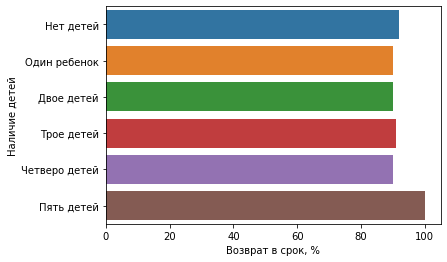

In [25]:
sns.barplot(data=info_children, x='Возврат в срок, %', y='Наличие детей');

**Вывод:** 

1. Заёмщики **без детей** на **2% чаще возвращали кредит в срок** по сравнению с заёмщками у которых есть дети.
2. Количество **детей от 1-го до 4-х** у заёмщика существенно **не влияет** на возврат кредита в срок, лишь заёмщики с **3-ми детьми** на **1% чаще** возвращали кредит в срок. 
3. Заёмщики с **пятью детьми** в **100%** случаев возвращали кредит **в срок**, однако этот показатель нельзя считать надежным, т.к. это **всего 9 случев из 21331**.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [26]:
# приведем к нижнему регистру значения family_status'
data['family_status'] = data['family_status'].str.lower() 
# методом agg() считаем необходимые значения по каждой группе
# count - всего заёмщиков
# sum - всего должников
# mean - доля должников
family_st_group = data.groupby('family_status').agg({'debt': ['count','sum','mean']}).reset_index()
# family_st_group

In [27]:
# создаем таблицу с результатами
group_family = pd.DataFrame({"Семейный статус": family_st_group['family_status'],
                              "Всего заёмщиков": family_st_group['debt' ,'count'],
                                "Всего должников": family_st_group['debt' ,'sum'],
                                   "Доля должников": family_st_group['debt' ,'mean']}
                            ).sort_values(by= 'Всего заёмщиков', ascending = False)

group_family = group_family.reset_index(drop=True).style.format({'Доля должников': '{:.1%}'})
group_family

,Семейный статус,Всего заёмщиков,Всего должников,Доля должников
0,женат / замужем,12261,927,7.6%
1,гражданский брак,4134,385,9.3%
2,не женат / не замужем,2796,273,9.8%
3,в разводе,1189,84,7.1%
4,вдовец / вдова,951,63,6.6%


**Вывод:** 

1. Заёмщики в стаусах **"Гражданский брак"** или **"Не женат / не замужем"** в **9.3%** и **9.8%** случаев, соответственно **нарушают** срок выплат по кредиту. Это на **2-3 % чаще**, чем заёмщки с другим семейным статусом. 
Вероятная причина - низкий уровень личной самодисциплины и ответственности в целом. 
2. Самыми **дисциплинированными по соблюдению сроков выплат** являются заёмщики в статусе **"Вдовец / вдова"**. Они нарушают срок выплат **лишь в 6.6%** случаев.
3. Заёмщики в статусах **"Женат / замужем"** или **"В разводе"** нарушают сроки по выплатам практически одинаково - в **7.1%** и **7,6%** случаев, соответвенно.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [28]:
# группируем данные по выплатам в зависимости от дохода
data.groupby('debt')['total_income_category'].value_counts()

debt  total_income_category
0     C                        14568
      B                         4660
      D                          328
      A                           23
      E                           20
1     C                         1353
      B                          354
      D                           21
      A                            2
      E                            2
Name: total_income_category, dtype: int64

In [29]:
# создаем таблицу с результатами группировки data
group_income_category = [['0 – 30 000', 20, 2], 
                ['30 001 – 50 000', 328, 21],
                ['50 001–200 000', 14568, 1353],
                ['200 001–1 000 000', 4660, 354],
                ['1 000 001 и выше', 23, 2]]                                                 
# названия столбоцов 
columns_income_category = ['Уровень дохода','Вернули в срок','Задержали']                                                
info_income_category = pd.DataFrame(data=group_income_category, columns=columns_income_category)
# добавим столбец с расчётом возврата в срок
info_income_category['Возврат в срок, %'] = (info_income_category['Вернули в срок'] / 
                                      (info_income_category['Вернули в срок'] + 
                                       info_income_category['Задержали']) * 100).astype('int') 
# вывод таблицы
info_income_category

,Уровень дохода,Вернули в срок,Задержали,"Возврат в срок, %"
0,0 – 30 000,20,2,90
1,30 001 – 50 000,328,21,93
2,50 001–200 000,14568,1353,91
3,200 001–1 000 000,4660,354,92
4,1 000 001 и выше,23,2,92


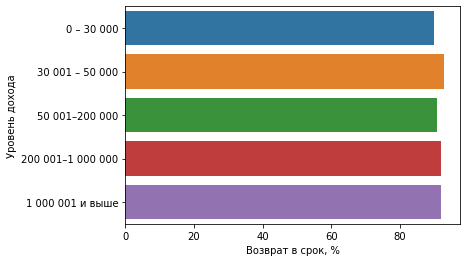

In [30]:
sns.barplot(data=info_income_category, x='Возврат в срок, %', y='Уровень дохода');

**Вывод:** 

1. Самые дисциплинированные заёмщики имеют уровень дохода в пределах **30 001 – 50 000**, они задерживали выплаты **лишь в 7%** случаев.
2. Чаще других **задерживали выплаты** заёмщики с доходом до **30 000**, среди них задержки выплат встречались в **10%** случаев.
3. Заёмщки доходом от **50 000 - 200 000** сроки по выплатам нарушали в **9%** случаев, а с доходом свыше **200 000** - лишь в **8%**. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [31]:
# группируем данные в сводную таблицу в зависимости от целей кредитования
# count - общее количиство заёмщиков
# sum - количество должников
# mean - доля должников
group_purpose_cat = pd.pivot_table(data, index='purpose_category',
                                    values='debt',
                                     aggfunc=['count', sum, 'mean']
                                      ).reset_index()
# group_purpose_cat

In [32]:
# создаем таблицу с результатами
# отсортируем по убыванию по столбцу 'Всего заёмщиков'
group_purpose = pd.DataFrame({"Цель кредита": group_purpose_cat['purpose_category'],
                              "Всего заёмщиков": group_purpose_cat['count', 'debt'],
                                "Всего должников": group_purpose_cat['sum', 'debt'],
                                   "Доля должников": group_purpose_cat['mean', 'debt']}
                            ).sort_values(by= 'Всего заёмщиков', ascending = False)
# сбросим и перезапишем индексы, отформатирем проценты в столбце 'Доля должников'
group_purpose = group_purpose.reset_index(drop=True).style.format({'Доля должников': '{:.2%}'})
group_purpose

,Цель кредита,Всего заёмщиков,Всего должников,Доля должников
0,операции с недвижимостью,10751,780,7.26%
1,операции с автомобилем,4279,400,9.35%
2,получение образования,3988,369,9.25%
3,проведение свадьбы,2313,183,7.91%


**Вывод:** 

1. Заёмщики целями кредита которых являются **"Операции с автомобилем"** или **"Получение образования"** **задерживают** сроки выплат в **9% случаев**.
2. Заёмщики целями кредита которых являются **"Операции с недвижимостью"** или **"Проведение свадьбы"** более **дисциплинированы** и задерживают выплаты лишь в **7,2%** и **7,9%** случаев, соответственно.

In [33]:
# Код ревьюера
group_purpose_cat.columns = ["Цель кредита", "Всего заёмщиков", "Всего должников",  "Доля должников"]
group_purpose = group_purpose_cat.reset_index(drop=True).style.format({'Доля должников': '{:.2%}'})
group_purpose

,Цель кредита,Всего заёмщиков,Всего должников,Доля должников
0,операции с автомобилем,4279,400,9.35%
1,операции с недвижимостью,10751,780,7.26%
2,получение образования,3988,369,9.25%
3,проведение свадьбы,2313,183,7.91%


#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

**Ответ:** 

1. В исходных данных пропуски определяются в столбцах *days_employed* — общий трудовой стаж в днях и *total_income* — ежемесячный доход.
2. Пропуски в указанных столбцах находятся в одной строке, т.е. если есть пропуск в *days_employed*, то он определяется и в *total_income*.
3. Можно предположить, что данные пропуски не являются случайными, часто стаж и доход имеют взаимозависимость.

Возможные причины появления пропусков:
- объединение двух баз с ошибками
- потеря одного из значений, например, стажа привело к потере второго значения

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

**Ответ:**

Медиана показывает наиболее близкий показатель к истинно среднему, так как на неё не влияют значения, которые сильно выбиваются (так называемые "выбросы") из ряда чисел.

### Шаг 4: общий вывод.

Самым **дисциплинированным** клиентом, который **вернет кредит точно в срок** будет заёмщик:
- без детей
- в статусе **"Вдовец / вдова"** или **"Женат / замужем"** или **"В разводе"**
- с доходом от **30 000 до 50 000**
- цель кредита: **"Операции с недвижимостью"** или **"Проведение свадьбы"**

Вероятность **задержки выплат** выплат по кредиту максимальна, если заёмщик:
- имеет **1-2 или 3 детей**
- находится в статусе **"Гражданский брак"** или **"Не женат / не замужем"**
- имеет доход **до 30 000**
- цель кредита: **"Операции с автомобилем"** или **"Получение образования"**